<a href="https://colab.research.google.com/github/rkdus5485/Skyline_Operator/blob/main/Skyline_BNL_%EA%B0%80%EC%9A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skyline Operator BNL, BNL_sol, BNL_solrep

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun March 14 16:12:58 2021
@author: KGY
"""
import numpy as np
from sys import getsizeof
import time
import copy
import matplotlib.pyplot as plt

## 함수 정의

### Dominate 함수

In [2]:

def dominate (record1, record2):
  result0 = record1[0] - record2[0]
  result1 = record1[1] - record2[1]
  
  if result0<0 and result1<0:
    return 2
  if result0<0 and result1>0:
    return 0
  if result0<0 and result1==0:
    return 2
  if result0>0 and result1<0:
    return 0
  if result0>=0 and result1>=0:
    return 1
  if result0==0 and result1<0:
    return 2
  

  

### BNL basic

In [3]:
def BNL_basic (origin_database, w_size) :
    start_time = time.time()
    database = copy.copy(origin_database)
    #operating_setting = np.zeros.((database[0].att.shape),dtype='i2') ## 0 for min 1 for max 2 for distinct, basically for min
    w_size = w_size
    count =1
    window = []
    temp = []
    skylines = []
    
    while database :
        print('\n')
        print(count,'번째 iteration')
        for record in list(database) :
            if not window :
                window.append(record)
                print('append : window is ', window)
                database.remove(record)
                print('remove from database is ', record)
                #print('window=',window)
                continue                
            record_dominated = False
            """
            if count != 1:
              for sky in list(skylines):
                if dominate(sky, record)==2:
                  print('skyline에서 비교할 친구는 sky : ', sky)
                  print('sky가 제일 좋아 : skylines : ', skylines)
                  database.remove(record)
                  record_dominated=True
              continue
            """


            for target in list(window) :
                print('\nthis turn record is ', record)
                print('this turn target is ', target)
                if dominate(record, target) == 1 :
                    print('d=1 : remove from database is ', record)
                    database.remove(record)
                    record_dominated = True
                    """
                    if count != 1:
                      print('실행할겡 ~!')
                      for record_1 in list(skylines):
                        if dominate(record_1, target)==2:
                          print('d=2 : remove from window by skylines is ', target)
                          window.remove(target)
                          if len(window)==0:
                            break
                    """
                    break
                elif dominate(record, target) == 2 :
                    print('d=2 : remove from window is ', target)
                    window.remove(target)
                    """
                    if count != 1 :
                        print('실행할겡 ~!')
                        for record_1 in list(skylines):
                          if dominate(record_1, target) == 2:
                            print('d=2 : remove from window by skylines is ,', target)
                            window.remove(target)
                            if len(window)==0:
                              break
                    """
                    continue
                elif dominate(record, target) == 0 :
                    print('incomparable')
                    continue
            
            if record_dominated :
                continue
            if len(window) < w_size :               
                window.append(record)
                print('append : window is ', window)
            else :
                
                temp.append(record)
                print('append : temp is', temp)
            database.remove(record)            
        print('count는 ',count)
        
        if count != 1 :
          for target in list(window):
            print('실행할겡 ~!')
            for record_1 in list(skylines):
              
              if dominate(record_1, target) == 2:
                if len(window)!= 0 :
                  print('지금 window는 : ', window)
                  print('지금 target은 :', target)

                  window.remove(target)
                  print('d=2 : remove from window by skylines is ,', target)
                  break
                  #if len(window)==0:
                    #break
              elif dominate(record_1, target) == 1:
                print('sky에서 뺄게~!')
                skylines.remove(record_1)
        skylines = skylines + window
        print('skyline : ', skylines)
        count += 1
        database = database + temp
        print('database : ', database)
        temp.clear()
        print('temp clear 후 database : ', database)
        window.clear()
    cost_time = time.time() - start_time
    print('window: ',window)
    print('skylines : ',skylines)
    print('database: ',database)
    return [cost_time, skylines]

### BNL_sol

In [35]:
def BNL_sol (origin_database,w_size) :

    start_time = time.time()
    database = copy.copy(origin_database)
    #operating_setting = np.zeros.((database[0].att.shape),dtype='i2') ## 0 for min 1 for max 2 for distinct, basically for min
    
    #window size가 작을때 (즉 skyline 개수보다 작을때) self_organizing list인지 확인이 잘 되지 않으나
    #window size가 클때 (즉 skyline 개수 보다 클때) self_organizing list인지 확인이 잘 됨
    w_size = w_size
    count =1
    window = []
    temp = []
    skylines = []
    trade = [] # window 순서 바꿀때 임시로 넣을 list
    
    while database :
        print('\n')
        print(count,'번째 iteration')
        for record in list(database) :
            if not window :
                window.append(record)
                print('append : window is ', window)
                database.remove(record)
                print('remove from database is ', record)
                #print('window=',window)
                continue                
            record_dominated = False
            for target in list(window) :
                print('\nthis turn record is ', record)
                print('this turn target is ', target)
                if dominate(record, target) == 1 :
                    print('d=1 : remove from database is ', record)
                    database.remove(record)
                    record_dominated = True

                    # self organizing
                    #print('trade 전 window : ', window)
                    trade.append(target)
                    #print('임시로 넣은 trade : ', trade)
                    window.remove(target)
                    window.insert(0,trade[0])
                    #print('자리 바꾼 후 window : ', window)
                    trade.clear()
                    #print('clear한 trade : ', trade)

                    
                    """if count != 1:
                      print('실행할겡 ~!')
                      for record_1 in list(skylines):
                        if dominate(record_1, target)==2:
                          print('d=2 : remove from window by skylines is ', target)
                          window.remove(target)
                          if len(window)==0:
                            break"""
                    
                    break
                elif dominate(record, target) == 2 :
                    print('d=2 : remove from window is ', target)
                    window.remove(target)
                    """
                    if count != 1 :
                        print('실행할겡 ~!')
                        for record_1 in list(skylines):
                          if dominate(record_1, target) == 2:
                            print('d=2 : remove from window by skylines is ,', target)
                            window.remove(target)
                            if len(window)==0:
                              break
                    """
                    continue
                elif dominate(record, target) == 0 :
                    print('incomparable')
                    
                    continue
            
            if record_dominated :
                continue
            if len(window) < w_size :               
                window.append(record)
                print('append : window is ', window)
            else :
                temp.append(record)
                print('append : temp is', temp)
            database.remove(record)            
        
        print('count는 ',count)
        if count != 1 :
          for target in list(window):
            print('실행할겡 ~!')
            for record_1 in list(skylines):
              
              if dominate(record_1, target) == 2:
                if len(window)!= 0 :
                  print('지금 window는 : ', window)
                  print('지금 target은 :', target)

                  window.remove(target)
                  print('d=2 : remove from window by skylines is ,', target)
                  break
                  #if len(window)==0:
                    #break
              elif dominate(record_1, target) == 1:
                print('sky에서 뺄게~!')
                skylines.remove(record_1)
        skylines = skylines + window
        count += 1
        print('skyline : ', skylines)
        database = database + temp
        print('database : ', database)
        temp.clear()
        print('temp clear 후 database : ', database)
        window.clear()
    cost_time = time.time() - start_time
    print('window: ',window)
    print('skylines : ',skylines)
    print('database: ',database)
    return [cost_time, skylines]

### BNL_solrep

In [36]:
def BNL_solrep (origin_database,w_size) :

    start_time = time.time()
    database = copy.copy(origin_database)
    #operating_setting = np.zeros.((database[0].att.shape),dtype='i2') ## 0 for min 1 for max 2 for distinct, basically for min
    
    #window size가 작을때 (즉 skyline 개수보다 작을때) self_organizing list인지 확인이 잘 되지 않으나
    #window size가 클때 (즉 skyline 개수 보다 클때) self_organizing list인지 확인이 잘 됨
    w_size = w_size
    count =1
    window = []
    temp = []
    skylines = []
    trade = [] # window 순서 바꿀때 임시로 넣을 list
    area = [] # price*distance 값 넣을 dictionary
    
    while database :
        print('\n')
        print(count,'번째 iteration')
        for record in list(database) :
            if not window :
                window.append(record)
                print('append : window is ', window)
                database.remove(record)
                print('remove from database is ', record)
                #print('window=',window)
                continue                
            record_dominated = False
            for target in list(window) :
                print('\nthis turn record is ', record)
                print('this turn target is ', target)
                if dominate(record, target) == 1 :
                    print('d=1 : remove from database is ', record)
                    database.remove(record)
                    record_dominated = True

                    # self organizing
                    #print('trade 전 window : ', window)
                    trade.append(target)
                    #print('임시로 넣은 trade : ', trade)
                    window.remove(target)
                    window.insert(0,trade[0])
                    #print('자리 바꾼 후 window : ', window)
                    trade.clear()
                    #print('clear한 trade : ', trade)

                    
                    """if count != 1:
                      print('실행할겡 ~!')
                      for record_1 in list(skylines):
                        if dominate(record_1, target)==2:
                          print('d=2 : remove from window by skylines is ', target)
                          window.remove(target)
                          if len(window)==0:
                            break"""
                    
                    break
                elif dominate(record, target) == 2 :
                    print('d=2 : remove from window is ', target)
                    window.remove(target)
                    """
                    if count != 1 :
                        print('실행할겡 ~!')
                        for record_1 in list(skylines):
                          if dominate(record_1, target) == 2:
                            print('d=2 : remove from window by skylines is ,', target)
                            window.remove(target)
                            if len(window)==0:
                              break
                    """
                    continue
                elif dominate(record, target) == 0 :
                    
                    print('incomparable')
                    print('this time window is : ', window)
                    """
                    if len(window) >= w_size : 
                      if record[0]*record[1]<target[0]*target[1]:
                        temp.append(target)
                        window.remove(target)
                        window.append(record)
                        print('곱 비교 후 window : ', window)
                        print('곱 비교 후 temp : ', temp)
                    else :
                      continue
                    """
                    continue
            
            if record_dominated :
                continue
            if len(window) < w_size :               
                window.append(record)
                print('append : window is ', window)
                
            else :
                for k in range(len(window)):
                  area.append(window[k][0]*window[k][1])
                area.append(record[0]*record[1])
                print('area : ', area)

                if max(area)==record[0]*record[1]:
                  print('record의 곱이 가장 크니 그냥 temp에 넣장')
                  temp.append(record)
                  print('이때 record는 ? : ', record)
                  print('지금 window : ',window)
                  print('지금 temp : ', temp)
                  area.clear()
                else :
                  print('window에서 record 곱보다 큰게 나왔다!')
                  max_index=area.index(max(area))
                  print('바뀔 친구는 : ', window[max_index])
                  temp.append(window[max_index])
                  print('temp에 넣기 : ', temp)
                  window.remove(window[max_index])
                  print('제일 큰 애 window에서 뺀 후 : ', window)
                  window.append(record)
                  print('record를 window에 넣은 후 window : ', window)
                  area.clear()



                """
                if record[0]*record[1]<target[0]*target[1]:
                  print('record가 target보다 곱이 작아서 window 바꿀거양 !')
                  temp.append(target)
                  window.remove(target)
                  window.append(record)
                  print('곱 비교 후 window : ', window)
                  print('곱 비교 후 temp : ', temp)
                else :
                  print('window 안바꿀거양 record 곱이 더 크거든 ~')
                  temp.append(record)
                  print('append : temp is', temp)
                """
            database.remove(record)            
        
        print('count는 ',count)
        if count != 1 :
          for target in list(window):
            print('실행할겡 ~!')
            for record_1 in list(skylines):
              
              if dominate(record_1, target) == 2:
                if len(window)!= 0 :
                  print('지금 window는 : ', window)
                  print('지금 target은 :', target)

                  window.remove(target)
                  print('d=2 : remove from window by skylines is ,', target)
                  break
                  #if len(window)==0:
                    #break
              elif dominate(record_1, target) == 1:
                print('sky에서 뺄게~!')
                skylines.remove(record_1)
        skylines = skylines + window
        count += 1
        print('skyline : ', skylines)
        database = database + temp
        print('database : ', database)
        temp.clear()
        print('temp clear 후 database : ', database)
        window.clear()
    cost_time = time.time() - start_time
    print('window: ',window)
    print('skylines : ',skylines)
    print('database: ',database)
    return [cost_time, skylines]

## skyline인 점들을 빨간색으로 찍기 위한 plot

In [37]:
def plot_sky(result_1, origin_database):
  print("skyline",result_1[1])

  for record in origin_database:
    plt.scatter(record[0],record[1],c="blue")
    
  for rrr in result_1[1]:
    plt.scatter(rrr[0],rrr[1],c="red") 
  print("time:",result_1[0])

## 사용할 데이터를 uniform, randint로 500개 뽑기

In [52]:
import random
origin_database_uni=[]
num=1000
for i in range(num):
  a=[random.uniform(0.00,100.00) for r in range(2)]
  c=[round(a[0],2),round(a[1],2)]
  origin_database_uni.append(c)

In [53]:
import random
origin_database_ran=[]
num=1000
for i in range(num):
  a=[random.randint(0,100) for r in range(2)]
  c=[a[0],a[1]]
  origin_database_ran.append(c)

## 결과

### unifrom 결과 (BNL_basic, BNL_sol, BNL_solrep)

In [54]:
result_BNL_uni = BNL_basic(origin_database_uni,3)
result_BNL_uni



1 번째 iteration
append : window is  [[49.49, 47.73]]
remove from database is  [49.49, 47.73]

this turn record is  [78.08, 13.3]
this turn target is  [49.49, 47.73]
incomparable
append : window is  [[49.49, 47.73], [78.08, 13.3]]

this turn record is  [82.18, 71.15]
this turn target is  [49.49, 47.73]
d=1 : remove from database is  [82.18, 71.15]

this turn record is  [20.22, 4.84]
this turn target is  [49.49, 47.73]
d=2 : remove from window is  [49.49, 47.73]

this turn record is  [20.22, 4.84]
this turn target is  [78.08, 13.3]
d=2 : remove from window is  [78.08, 13.3]
append : window is  [[20.22, 4.84]]

this turn record is  [27.6, 49.0]
this turn target is  [20.22, 4.84]
d=1 : remove from database is  [27.6, 49.0]

this turn record is  [6.06, 63.04]
this turn target is  [20.22, 4.84]
incomparable
append : window is  [[20.22, 4.84], [6.06, 63.04]]

this turn record is  [85.18, 65.37]
this turn target is  [20.22, 4.84]
d=1 : remove from database is  [85.18, 65.37]

this turn record

[1.0385394096374512,
 [[6.87, 0.82],
  [0.59, 7.14],
  [18.67, 0.28],
  [2.08, 6.65],
  [38.34, 0.26],
  [0.03, 65.51],
  [56.59, 0.16],
  [0.42, 34.15]]]

In [55]:
result_BNL_sol_uni = BNL_sol(origin_database_uni,3)
result_BNL_sol_uni



1 번째 iteration
append : window is  [[49.49, 47.73]]
remove from database is  [49.49, 47.73]

this turn record is  [78.08, 13.3]
this turn target is  [49.49, 47.73]
incomparable
append : window is  [[49.49, 47.73], [78.08, 13.3]]

this turn record is  [82.18, 71.15]
this turn target is  [49.49, 47.73]
d=1 : remove from database is  [82.18, 71.15]

this turn record is  [20.22, 4.84]
this turn target is  [49.49, 47.73]
d=2 : remove from window is  [49.49, 47.73]

this turn record is  [20.22, 4.84]
this turn target is  [78.08, 13.3]
d=2 : remove from window is  [78.08, 13.3]
append : window is  [[20.22, 4.84]]

this turn record is  [27.6, 49.0]
this turn target is  [20.22, 4.84]
d=1 : remove from database is  [27.6, 49.0]

this turn record is  [6.06, 63.04]
this turn target is  [20.22, 4.84]
incomparable
append : window is  [[20.22, 4.84], [6.06, 63.04]]

this turn record is  [85.18, 65.37]
this turn target is  [20.22, 4.84]
d=1 : remove from database is  [85.18, 65.37]

this turn record

[0.9645545482635498,
 [[0.59, 7.14],
  [18.67, 0.28],
  [6.87, 0.82],
  [2.08, 6.65],
  [0.03, 65.51],
  [38.34, 0.26],
  [56.59, 0.16],
  [0.42, 34.15]]]

In [56]:
result_BNL_solrep_uni = BNL_solrep(origin_database_uni,3)
result_BNL_solrep_uni

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
d=1 : remove from database is  [21.47, 21.42]

this turn record is  [51.88, 40.21]
this turn target is  [16.02, 1.4]
d=1 : remove from database is  [51.88, 40.21]

this turn record is  [33.31, 98.94]
this turn target is  [16.02, 1.4]
d=1 : remove from database is  [33.31, 98.94]

this turn record is  [14.56, 30.84]
this turn target is  [16.02, 1.4]
incomparable
this time window is :  [[16.02, 1.4], [1.24, 21.76]]

this turn record is  [14.56, 30.84]
this turn target is  [1.24, 21.76]
d=1 : remove from database is  [14.56, 30.84]

this turn record is  [42.44, 17.93]
this turn target is  [1.24, 21.76]
incomparable
this time window is :  [[1.24, 21.76], [16.02, 1.4]]

this turn record is  [42.44, 17.93]
this turn target is  [16.02, 1.4]
d=1 : remove from database is  [42.44, 17.93]

this turn record is  [40.9, 27.15]
this turn target is  [16.02, 1.4]
d=1 : remove from database is  [40.9, 27.15]

this turn record is  [49.45, 28.47]
this turn target is  [

[1.1059250831604004,
 [[0.59, 7.14],
  [18.67, 0.28],
  [0.03, 65.51],
  [6.87, 0.82],
  [38.34, 0.26],
  [56.59, 0.16],
  [0.42, 34.15],
  [2.08, 6.65]]]

### randint(정수) 결과 (BNL_basic, BNL_sol, BNL_solrep)

In [57]:
result_BNL_ran = BNL_basic(origin_database_ran,3)
result_BNL_ran

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
this turn target is  [5, 18]
d=1 : remove from database is  [19, 30]

this turn record is  [89, 47]
this turn target is  [32, 0]
d=1 : remove from database is  [89, 47]

this turn record is  [63, 95]
this turn target is  [32, 0]
d=1 : remove from database is  [63, 95]

this turn record is  [78, 54]
this turn target is  [32, 0]
d=1 : remove from database is  [78, 54]

this turn record is  [98, 79]
this turn target is  [32, 0]
d=1 : remove from database is  [98, 79]

this turn record is  [77, 87]
this turn target is  [32, 0]
d=1 : remove from database is  [77, 87]

this turn record is  [5, 14]
this turn target is  [32, 0]
incomparable

this turn record is  [5, 14]
this turn target is  [5, 18]
d=2 : remove from window is  [5, 18]

this turn record is  [5, 14]
this turn target is  [7, 3]
incomparable
append : window is  [[32, 0], [7, 3], [5, 14]]

this turn record is  [97, 60]
this turn target is  [32, 0]
d=1 : remove from database is  [97, 60]

this tur

[1.0429356098175049, [[32, 0], [0, 8], [4, 1], [1, 4]]]

In [58]:
result_BNL_sol_ran = BNL_sol(origin_database_ran,3)
result_BNL_sol_ran



1 번째 iteration
append : window is  [[37, 50]]
remove from database is  [37, 50]

this turn record is  [88, 64]
this turn target is  [37, 50]
d=1 : remove from database is  [88, 64]

this turn record is  [15, 7]
this turn target is  [37, 50]
d=2 : remove from window is  [37, 50]
append : window is  [[15, 7]]

this turn record is  [97, 46]
this turn target is  [15, 7]
d=1 : remove from database is  [97, 46]

this turn record is  [11, 60]
this turn target is  [15, 7]
incomparable
append : window is  [[15, 7], [11, 60]]

this turn record is  [51, 21]
this turn target is  [15, 7]
d=1 : remove from database is  [51, 21]

this turn record is  [86, 70]
this turn target is  [15, 7]
d=1 : remove from database is  [86, 70]

this turn record is  [15, 89]
this turn target is  [15, 7]
d=1 : remove from database is  [15, 89]

this turn record is  [77, 41]
this turn target is  [15, 7]
d=1 : remove from database is  [77, 41]

this turn record is  [45, 58]
this turn target is  [15, 7]
d=1 : remove fro

[0.896190881729126, [[0, 8], [4, 1], [32, 0], [1, 4]]]

In [59]:
result_BNL_solrep_ran = BNL_sol(origin_database_ran,3)
result_BNL_solrep_ran



1 번째 iteration
append : window is  [[37, 50]]
remove from database is  [37, 50]

this turn record is  [88, 64]
this turn target is  [37, 50]
d=1 : remove from database is  [88, 64]

this turn record is  [15, 7]
this turn target is  [37, 50]
d=2 : remove from window is  [37, 50]
append : window is  [[15, 7]]

this turn record is  [97, 46]
this turn target is  [15, 7]
d=1 : remove from database is  [97, 46]

this turn record is  [11, 60]
this turn target is  [15, 7]
incomparable
append : window is  [[15, 7], [11, 60]]

this turn record is  [51, 21]
this turn target is  [15, 7]
d=1 : remove from database is  [51, 21]

this turn record is  [86, 70]
this turn target is  [15, 7]
d=1 : remove from database is  [86, 70]

this turn record is  [15, 89]
this turn target is  [15, 7]
d=1 : remove from database is  [15, 89]

this turn record is  [77, 41]
this turn target is  [15, 7]
d=1 : remove from database is  [77, 41]

this turn record is  [45, 58]
this turn target is  [15, 7]
d=1 : remove fro

[0.9134392738342285, [[0, 8], [4, 1], [32, 0], [1, 4]]]

### 각 결과를 plot_sky로 그래프 출력

skyline [[6.87, 0.82], [0.59, 7.14], [18.67, 0.28], [2.08, 6.65], [38.34, 0.26], [0.03, 65.51], [56.59, 0.16], [0.42, 34.15]]
time: 1.0385394096374512


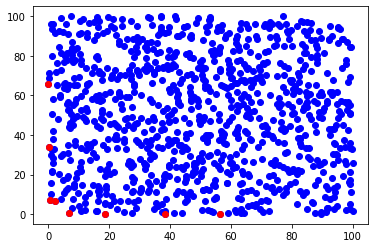

In [60]:
plot_sky(result_BNL_uni, origin_database_uni)

skyline [[0.59, 7.14], [18.67, 0.28], [6.87, 0.82], [2.08, 6.65], [0.03, 65.51], [38.34, 0.26], [56.59, 0.16], [0.42, 34.15]]
time: 0.9645545482635498


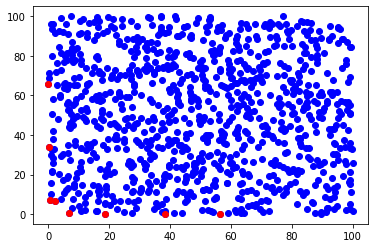

In [61]:
plot_sky(result_BNL_sol_uni, origin_database_uni)

skyline [[0.59, 7.14], [18.67, 0.28], [0.03, 65.51], [6.87, 0.82], [38.34, 0.26], [56.59, 0.16], [0.42, 34.15], [2.08, 6.65]]
time: 1.1059250831604004


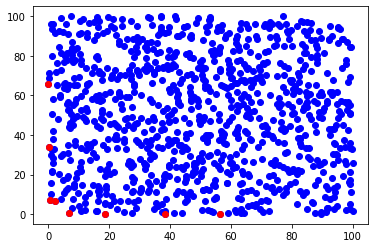

In [62]:
plot_sky(result_BNL_solrep_uni, origin_database_uni)

skyline [[32, 0], [0, 8], [4, 1], [1, 4]]
time: 1.0429356098175049


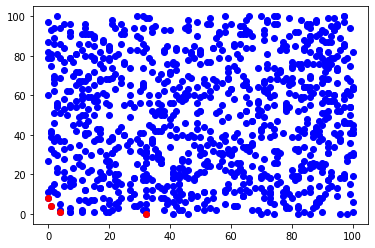

In [63]:
plot_sky(result_BNL_ran, origin_database_ran)

skyline [[0, 8], [4, 1], [32, 0], [1, 4]]
time: 0.896190881729126


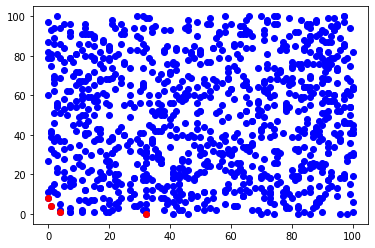

In [64]:
plot_sky(result_BNL_sol_ran, origin_database_ran)

skyline [[0, 8], [4, 1], [32, 0], [1, 4]]
time: 0.9134392738342285


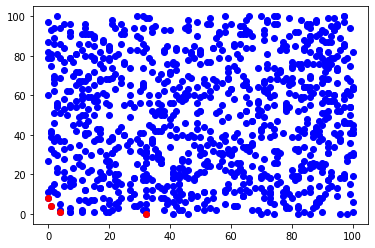

In [65]:
plot_sky(result_BNL_solrep_ran, origin_database_ran)